In [16]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
from utils import utils

In [17]:
def magnitude(fft_im):
    real = fft_im.real
    imag = fft_im.imag
    return np.sqrt(real**2 + imag**2)

def convolve_im(im: np.array,
                kernel: np.array,
                title: str = "",
                verbose=True):
    """ Convolves the image (im) with the spatial kernel (kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution
        
        Note: kernel can be of different shape than im.

    Args:
        im: np.array of shape [H, W]
        kernel: np.array of shape [K, K] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    # Step 1: FFT
    im_fft = np.fft.fft2(im) # Translate im to frequency domain by taking fourier transform

    # Step 2: FFT Kernel
    H, _ = im.shape 
    K, _ = kernel.shape 
    kernel = np.pad(kernel, ((0, H-K), (0, H-K)), 'constant') # Pad for getting same dimension
    fft_kernel = np.fft.fft2(kernel)

    # Step 3: Convolution / FFT multiplication
    conv_im_fft = im_fft * fft_kernel

    # Step 4: IFFT, result
    conv_result_fft = np.fft.ifft2(conv_im_fft) # Take inverse fourier transform for translating back to the spatial domain
    conv_result = np.real(conv_result_fft) # Get the real part of complex number

    if verbose:
        # For illustration purposes, we have to shift and take abs for the magnitude.
        # We also need to take the log for some of them, else it only displays a black frame
        im_fft = np.log(np.abs(np.fft.fftshift((im_fft))))
        fft_kernel = np.abs(np.fft.fftshift(fft_kernel))
        conv_im_fft = np.log(np.abs(np.fft.fftshift((conv_im_fft))))

        # Define figure
        fig, ax = plt.subplots(nrows=1, ncols=5)
        if title:
            fig.suptitle(title, fontsize=16)
        for axis in ax.ravel(): 
            axis.set_axis_off()
        fig.set_size_inches((20,4))
        # Remember to use cmap=gray!
        
        # Visualize original image
        ax[0].set_title("Original image")
        ax[0].imshow(im, cmap="gray")
        
        # Visualize FFT
        ax[1].set_title("FFT of image")
        ax[1].imshow(im_fft, cmap="gray")
        
        # Visualize FFT kernel
        ax[2].set_title("FFT kernel")
        ax[2].imshow(fft_kernel, cmap="gray")

        # Visualize filtered FFT image
        ax[3].set_title("FFT multiplication / convolution")
        ax[3].imshow(conv_im_fft, cmap="gray")
        
        # Visualize filtered spatial image
        ax[4].set_title("Filtered spatial image")
        ax[4].imshow(conv_result, cmap="gray")

    return conv_result

/var/folders/r9/5r0c_f5s0kg0m5r4rcpytjpw0000gn/T/ipykernel_25946/3128501261.py:46: RuntimeWarning: divide by zero encountered in log
  conv_im_fft = np.log(np.abs(np.fft.fftshift((conv_im_fft))))


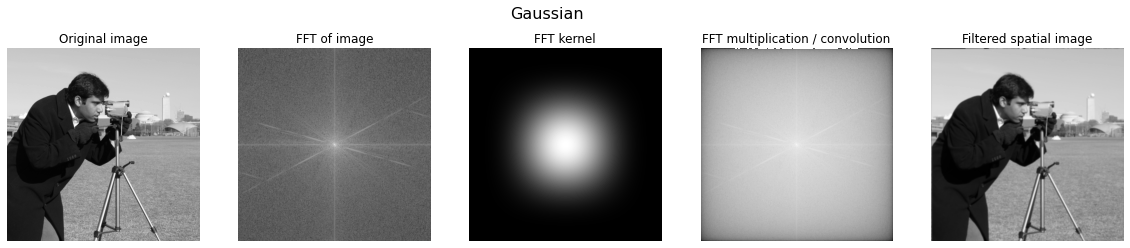

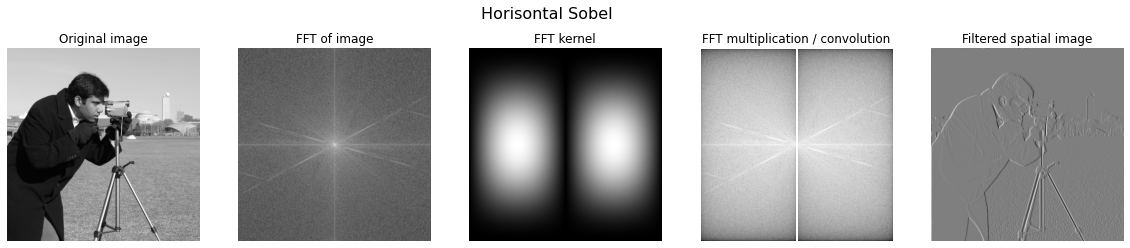

Saving image to: data/results/task4b_camera_gaussian.png


/Users/martinjohannesnilsen/OneDrive - NTNU/Fag/Datateknologi 1. semester/TDT4195 - Grunnleggende visuell databehandling/image processing/assignment2/src/utils/utils.py:81: UserWarning: Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)
  warnings.warn("Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)")


Saving image to: data/results/task4b_camera_sobelx.png


In [18]:
if __name__ == "__main__":
    verbose = True  # change if you want

    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)

    # DO NOT CHANGE
    gaussian_kernel = np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1],
    ]) / 256
    image_gaussian = convolve_im(im, gaussian_kernel, "Gaussian", verbose)

    # DO NOT CHANGE
    sobel_horizontal = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    image_sobelx = convolve_im(im, sobel_horizontal, "Horisontal Sobel", verbose)

    if verbose:
        plt.show()

    utils.save_im("task4b_camera_gaussian.png", image_gaussian)
    utils.save_im("task4b_camera_sobelx.png", image_sobelx)